# PROBLEM STATEMENT : To Predict whether a Netflix TV Show would have an IMDB rating above 7.0 and R-Rating above 75.

# 1. Importing Packages

In [39]:
import numpy as np
import pandas as pd
import pandas_profiling as p
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About The Data

At our hand we have a huge Dataset containing different web-series' and Tv-Shows. The data will give us various insights of the OTT industry which has become a mainstay in our lives.  

# Introduction

The OTT industry has grown in leaps and bounds during the last decade or so. We are going to analyse one of the OTT giants-'NETFLIX'. Since 2010 the number of web series' on netflix has tripled while the number of movies aired have reduced by a significant margin. 

# 2.Data Visualization 

# Importing Data

In [40]:
data=pd.read_csv("C:/Users/athar/OneDrive/Documents/All_Streaming_Shows.csv",encoding='unicode-escape')
data.head(10)

,ï»¿Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix
1,Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO"
2,Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu"
3,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix
4,The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as âT...,2Seasons,Prime Video
5,Dark,2017,16+,8.8,95,"Crime,Drama",A missing child causes four families to help e...,3Seasons,Netflix
6,Chernobyl,2019,18+,9.4,95,"Drama,History",The true story of one of the worst man-made ca...,1Season,"HBO MAX,HBO"
7,Sherlock,2010,16+,9.1,94,"Action & Adventure,Crime",A modern update finds the famous sleuth and hi...,4Seasons,Netflix
8,Fargo,2014,18+,8.9,94,"Crime,Drama",A close-knit anthology series dealing with sto...,3Seasons,Hulu
9,Avatar: The Last Airbender,2005,7+,9.2,94,"Action & Adventure,Animation","In a war-torn world of elemental magic, a youn...",3Seasons,"Netflix,CBS All Access,Hoopla"


# 3.Data Profiling


- In the upcoming sections we will first understand our dataset using various pandas functionalities.
- Then with the help of pandas profiling we will find which columns of our dataset need preprocessing.
- In preprocessing we will deal with erronous and missing values of columns.
- Again we will do pandas profiling to see how preprocessing have transformed our dataset.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12353 entries, 0 to 12352
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿Series Title     12353 non-null  object 
 1   Year Released       12353 non-null  int64  
 2   Content Rating      7232 non-null   object 
 3   IMDB Rating         10207 non-null  float64
 4   R Rating            12353 non-null  int64  
 5   Genre               12353 non-null  object 
 6   Description         12353 non-null  object 
 7   No of Seasons       12353 non-null  object 
 8   Streaming Platform  10370 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 579.1+ KB


 From the above stats we observe that we have **12353** different Web-Series and Tv-Shows across all platforms'
 -  We can see there is some missing data as there are some incomplete records.
 -  All the variables are present in appropriate data types

# Understanding the data 

In [42]:
data.shape

(12353, 9)

In this data there are **12353 rows** and **9 columns** 

In [43]:
data.columns

Index(['ï»¿Series Title', 'Year Released', 'Content Rating', 'IMDB Rating',
       'R Rating', 'Genre', 'Description', 'No of Seasons',
       'Streaming Platform'],
      dtype='object')

In [44]:
data.describe()

,Year Released,IMDB Rating,R Rating
count,12353.000000,10207.000000,12353.000000
mean,2010.495345,6.973156,43.982029
std,11.240943,1.149726,20.660914
min,1901.000000,1.000000,-1.000000
25%,2009.000000,6.400000,33.000000
50%,2014.000000,7.200000,46.000000
75%,2017.000000,7.800000,58.000000
max,2020.000000,9.700000,100.000000


**Observations**
- Average IMDB Rating among all shows is **6.97**
- Lowest IMDB Rating is **1.00**
- Best IMDB RatIng is **9.70**

array([[<AxesSubplot:title={'center':'Year Released'}>,
        <AxesSubplot:title={'center':'IMDB Rating'}>],
       [<AxesSubplot:title={'center':'R Rating'}>, <AxesSubplot:>]],
      dtype=object)

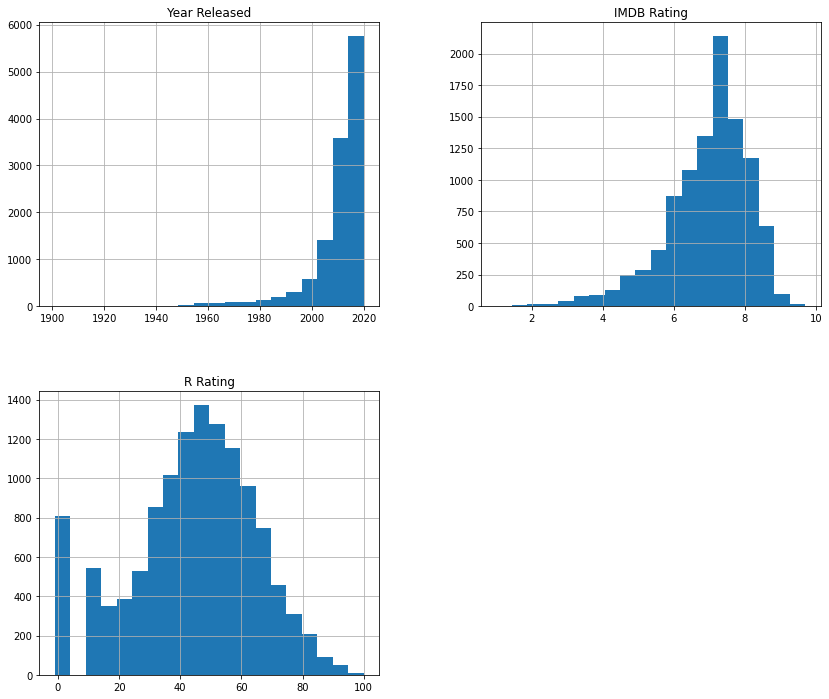

In [45]:
data.hist(bins=20,figsize=(14,12))

**Observations Based on the above histograms**
-  There is a steep increase in the number of Web-Series' in the years **2010-2020**.
-  R-Rating Graph highlights the fact that most shows have quite a moderate R-Rating i.e; between **40 and 60**
-  The IMDB graph depicts that more that **2000** shows have been rated between **7 and 8**
-  Another important observation shows that **750+** shows have an IMDB Rating **</=6 and** R-Rating **close to 0**


# 3.1 Pre-Profiling

- By pandas profiling, an **interactive HTML report** gets generated which contins all the information about the columns of the dataset, like the counts and type of each column. Detailed information about each column, **coorelation** between different columns and a sample of dataset.
-  It gives us **visual interpretation** of each column in the data.
-  Spread of the data can be better understood by the distribution plot.
-  *Grannular* level analysis of each column.

In [46]:
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title="Pandas Profiling Report")
profile.to_file("data_before-PreProcessing.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*You need to install pandas version 0.25 before pandasprofiling or you might face some errors while profiling*

**Observations from Pandas Profiling before Data processing dataset info:**
-  Number of variables: 09
-  Number of observations: 12353
-  Missing cells: 8.3%

**Variable Types:**
-  Numeric: 3
-  Categorical: 6

**Some Things to note:**
-  Mean R-Rating = 43.98
-  There is an equal distribution of shows amongst all Genres.
-  There are **5204** shows which have aired only for **1 Season**


# 3.1 Pre-Processing

-  Dealing with missing values
-  Removing/Replacing **5121** missing **Content Rating** values with its Mode
-  Deleting the **1983** missing values from the **Streaming Platform**

In [47]:
data.isnull().sum()

ï»¿Series Title          0
Year Released            0
Content Rating        5121
IMDB Rating           2146
R Rating                 0
Genre                    0
Description              0
No of Seasons            0
Streaming Platform    1983
dtype: int64

**Observations**
-  We can see that maximum null values are in **IMDB Rating** and **Streaming Platform**. Later we'll see how to deal with them.
-  **Content Rating** has **5121** null values which we will fill up by replacing them with the **Mode**

In [48]:
data=data.rename(columns={'ï»¿Series Title':'Series Title','Content Rating':'AgeFactor'})
data.head()

,Series Title,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix
1,Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO"
2,Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu"
3,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix
4,The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as âT...,2Seasons,Prime Video


In [49]:
data=data.set_index('Series Title')
data.head()

,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
Series Title,,,,,,,,
Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix
Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO"
Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu"
Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix
The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as âT...,2Seasons,Prime Video


In [50]:
data.AgeFactor=data.AgeFactor.fillna(data['AgeFactor'].mode()[0])   #Replaced the missing values by the mode.


In [51]:
data=data.dropna(axis=0,how='any')   #Dropping all the rows with missing IMDB Rating and Streaming Platform because neither can't we perform analysis on missing data nor on fabricated data.

In [52]:
data.isnull().sum()

Year Released         0
AgeFactor             0
IMDB Rating           0
R Rating              0
Genre                 0
Description           0
No of Seasons         0
Streaming Platform    0
dtype: int64

*As we can see we have dealt with all the missing values*

# 3.2 Post Pandas Profiling

In [53]:
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title="Pandas Profiling Report")
profile.to_file("data_after-PreProcessing.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations From the new report**

-  The data has been filtered and now we have a complete dataset at our hand.
-  In the Dataset info, Total Missing(%) = 0.0%
-  Number of variables = 09

# 4. Exploratory Data Analysis

In [54]:
data['AgeFactor'].value_counts().sort_index()

13+       5
16+    4467
18+    1328
7+     1608
all     911
Name: AgeFactor, dtype: int64

In [55]:
N=data['AgeFactor'][data['Streaming Platform']=='Netflix'].value_counts()
N

16+    690
18+    354
7+     193
all    102
13+      2
Name: AgeFactor, dtype: int64

In [56]:
PV=data['AgeFactor'][data['Streaming Platform']=='Prime Video'].value_counts()
PV

16+    360
18+     84
all     69
7+      54
Name: AgeFactor, dtype: int64

c:\users\athar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeFactor', ylabel='count'>

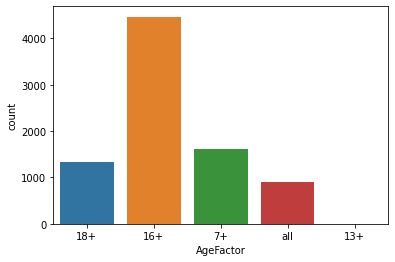

In [57]:
sns.countplot('AgeFactor',data=data)



**Observations**
-  Maximum  viewership is attracted towards **16+** shows.
-  18+ shows have less viewers.

Text(0.5, 1.0, 'Correlation Between Features')

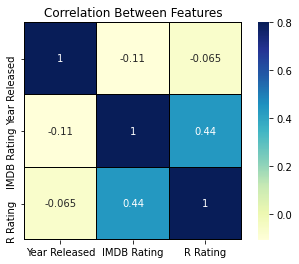

In [58]:
sns.heatmap(data.corr(),vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title("Correlation Between Features")


**Observations**

-  IMDB Rating is **negatively** related to Year Released. This implies significant **decrease** in the quality of the content.
-  R-Rating is also **negatively** related to Year Released.

In [59]:
import re
def extract_num_of_seasons(seasons):
    numOfSeasons = re.findall(r'\d+', seasons)[0]
    return int(numOfSeasons)

data['Seasons'] = data['No of Seasons'].apply(lambda x:extract_num_of_seasons(x))
data.describe()

,Year Released,IMDB Rating,R Rating,Seasons
count,8319.000000,8319.000000,8319.000000,8319.000000
mean,2010.323476,7.011528,52.262171,3.308571
std,11.386933,1.126076,14.576787,5.449642
min,1922.000000,1.000000,17.000000,1.000000
25%,2008.000000,6.400000,42.000000,1.000000
50%,2014.000000,7.200000,51.000000,2.000000
75%,2017.000000,7.800000,62.000000,4.000000
max,2020.000000,9.700000,100.000000,187.000000


In [60]:
IMDB_category=pd.cut(data['IMDB Rating'],bins=[1,3,5,6.5,7.5,8.5,10]).value_counts().sort_index()
Seasons_category=pd.cut(data['Seasons'],bins=[1,3,5,10,200]).value_counts().sort_index()
IMDB_category,Seasons_category

((1.0, 3.0]       42
 (3.0, 5.0]      465
 (5.0, 6.5]     1842
 (6.5, 7.5]     3095
 (7.5, 8.5]     2520
 (8.5, 10.0]     354
 Name: IMDB Rating, dtype: int64,
 (1, 3]       2458
 (3, 5]        948
 (5, 10]       799
 (10, 200]     392
 Name: Seasons, dtype: int64)

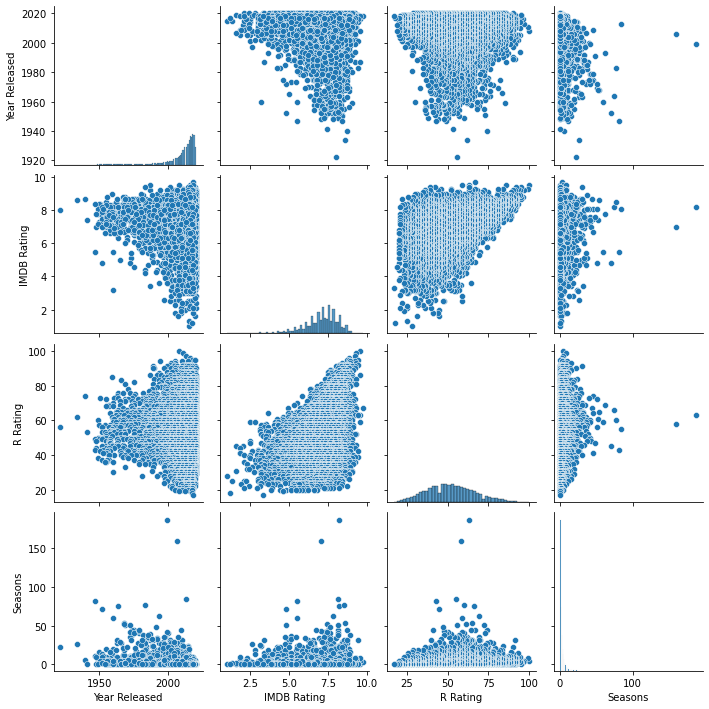

In [61]:
sns.pairplot(data)

c:\users\athar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IMDB Rating', ylabel='Seasons'>

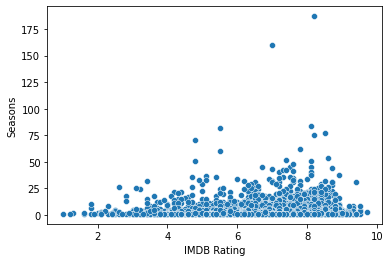

In [62]:
sns.scatterplot(data['IMDB Rating'], data['Seasons'])


c:\users\athar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeFactor', ylabel='R Rating'>

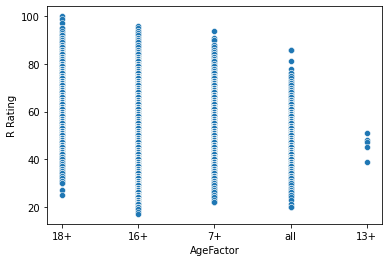

In [63]:
sns.scatterplot(data['AgeFactor'],data['R Rating'])

c:\users\athar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seasons', ylabel='R Rating'>

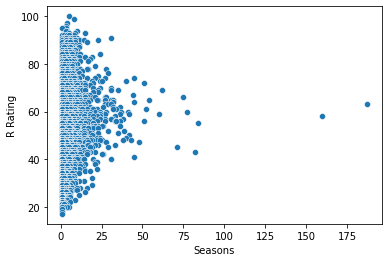

In [64]:
sns.scatterplot(data['Seasons'],data['R Rating'])

*It is very much observed that **Ratings** of the shows **decrease with increase** in No. of Seasons.*

**18+** *shows have the **best** R Ratings*. 

In [65]:
data.head()

,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Seasons
Series Title,,,,,,,,,
Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix,5
Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO",8
Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu",4
Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix,3
The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as âT...,2Seasons,Prime Video,2


In [66]:
data.drop(['Description','No of Seasons'],axis=1,inplace=True)

In [67]:
data.head()

,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Streaming Platform,Seasons
Series Title,,,,,,,
Breaking Bad,2008,18+,9.5,100,"Crime,Drama",Netflix,5
Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama","HBO MAX,HBO",8
Rick and Morty,2013,18+,9.2,97,"Animation,Comedy","Free Services,HBO MAX,Hulu",4
Stranger Things,2016,16+,8.8,96,"Drama,Fantasy",Netflix,3
The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",Prime Video,2


In [68]:
data['Overall Rating']=data['IMDB Rating']+data["R Rating"]


In [69]:
data['Rating %']=(data['Overall Rating']/110)*100
data.head()

,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Streaming Platform,Seasons,Overall Rating,Rating %
Series Title,,,,,,,,,
Breaking Bad,2008,18+,9.5,100,"Crime,Drama",Netflix,5,109.5,99.545455
Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama","HBO MAX,HBO",8,108.3,98.454545
Rick and Morty,2013,18+,9.2,97,"Animation,Comedy","Free Services,HBO MAX,Hulu",4,106.2,96.545455
Stranger Things,2016,16+,8.8,96,"Drama,Fantasy",Netflix,3,104.8,95.272727
The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",Prime Video,2,103.7,94.272727


# 5. Model Formation

In [70]:
data['Result']=(data['Rating %']>74.54).astype(int)
data.head()

,Year Released,AgeFactor,IMDB Rating,R Rating,Genre,Streaming Platform,Seasons,Overall Rating,Rating %,Result
Series Title,,,,,,,,,,
Breaking Bad,2008,18+,9.5,100,"Crime,Drama",Netflix,5,109.5,99.545455,1
Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama","HBO MAX,HBO",8,108.3,98.454545,1
Rick and Morty,2013,18+,9.2,97,"Animation,Comedy","Free Services,HBO MAX,Hulu",4,106.2,96.545455,1
Stranger Things,2016,16+,8.8,96,"Drama,Fantasy",Netflix,3,104.8,95.272727,1
The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",Prime Video,2,103.7,94.272727,1


In [71]:
x=data.loc[:,['Seasons']].values
y=data.loc[:,['Result']].values
x.shape,y.shape

((8319, 1), (8319, 1))

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain,ytrain)

c:\users\athar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [75]:
y_pred=classifier.predict(xtest)

In [77]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1905    1]
 [ 174    0]]


In [78]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.9158653846153846
